In [5]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['font.sans-serif'] = ['SimHei']  

In [6]:
# Set up the ticker and the date range
ticker_symbol = "META"
start_date = "2020-01-01"
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Fetch the data
stock_data = yf.download(ticker_symbol,start=start_date, end=end_date)
stock_data.tail(6)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-31,323.690002,325.660004,317.589996,318.600006,318.600006,25799600
2023-08-01,317.540009,324.140015,314.660004,322.709991,322.709991,22817900
2023-08-02,318.000000,318.390015,310.649994,314.309998,314.309998,20461100
2023-08-03,309.929993,315.950012,309.929993,313.190002,313.190002,15180200
2023-08-04,314.959991,318.410004,310.200012,310.730011,310.730011,17600200
2023-08-07,313.230011,317.070007,310.480011,316.559998,316.559998,16190466


In [12]:
# Create Bollinger Bands
stock_data.ta.bbands(close="Close",length=20,std=2.5, append = True)
stock_data = stock_data.iloc[:,:-2]
stock_data.rename(columns={'BBL_20_2.5': 'Lower', 'BBM_20_2.5': 'Middle','BBU_20_2.5':'Upper'}, inplace=True)
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Lower,Middle,Upper
Date,,,,,,,,,
2023-08-01,317.540009,324.140015,314.660004,322.709991,322.709991,22817900,277.711841,304.975499,332.239157
2023-08-02,318.000000,318.390015,310.649994,314.309998,314.309998,20461100,278.969267,305.972499,332.975731
2023-08-03,309.929993,315.950012,309.929993,313.190002,313.190002,15180200,281.006862,307.032500,333.058138
2023-08-04,314.959991,318.410004,310.200012,310.730011,310.730011,17600200,283.749978,308.042500,332.335023
2023-08-07,313.230011,317.070007,310.480011,316.559998,316.559998,16190466,285.838093,309.165500,332.492907


In [14]:
# Trading Signals
# For yesterday
stock_data['yesterday_close'] = stock_data['Close'].shift(1)
stock_data['yesterday_lower'] = stock_data['Lower'].shift(1)
stock_data['yesterday_upper'] = stock_data['Upper'].shift(1)
# Day before yesterday
stock_data['daybeforeyes_close'] = stock_data['Close'].shift(2)
stock_data['daybeforeyes_lower'] = stock_data['Lower'].shift(2)
stock_data['daybeforeyes_upper'] = stock_data['Upper'].shift(2)

In [16]:
# Buying signals
stock_data['signal'] = np.where(np.logical_and(
                             stock_data['daybeforeyes_close'] < stock_data['daybeforeyes_lower'],
                             stock_data['yesterday_close'] > stock_data['yesterday_lower']),
                             1, 0)

# Selling signals
stock_data['signal'] = np.where(np.logical_and(
                             stock_data['daybeforeyes_close'] > stock_data['daybeforeyes_upper'],
                             stock_data['yesterday_close'] < stock_data['yesterday_upper']),
                             -1, stock_data['signal'])

stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Lower,Middle,Upper,yesterday_close,yesterday_lower,yesterday_upper,daybeforeyes_close,daybeforeyes_lower,daybeforeyes_upper,signal
Date,,,,,,,,,,,,,,,,
2023-08-01,317.540009,324.140015,314.660004,322.709991,322.709991,22817900,277.711841,304.975499,332.239157,318.600006,276.006646,330.275351,325.480011,274.586173,328.533825,0
2023-08-02,318.000000,318.390015,310.649994,314.309998,314.309998,20461100,278.969267,305.972499,332.975731,322.709991,277.711841,332.239157,318.600006,276.006646,330.275351,0
2023-08-03,309.929993,315.950012,309.929993,313.190002,313.190002,15180200,281.006862,307.032500,333.058138,314.309998,278.969267,332.975731,322.709991,277.711841,332.239157,0
2023-08-04,314.959991,318.410004,310.200012,310.730011,310.730011,17600200,283.749978,308.042500,332.335023,313.190002,281.006862,333.058138,314.309998,278.969267,332.975731,0
2023-08-07,313.230011,317.070007,310.480011,316.559998,316.559998,16190466,285.838093,309.165500,332.492907,310.730011,283.749978,332.335023,313.190002,281.006862,333.058138,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Position of META')

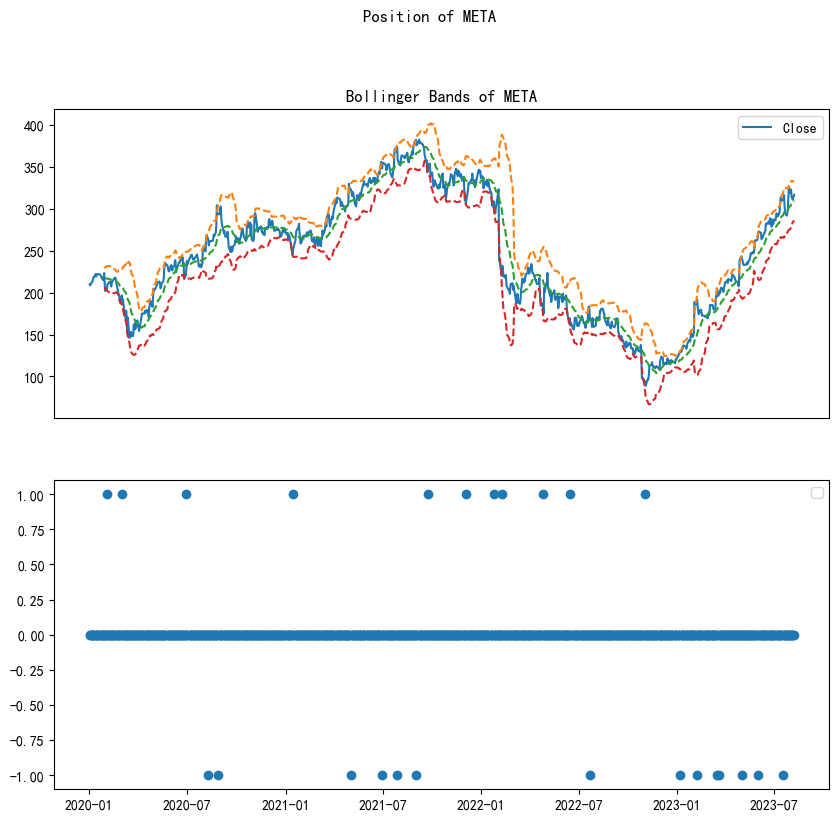

In [17]:
# Bollinger Bands and Position Plot
plt.subplot(2,1,1)
plt.title('Bollinger Bands of META')
plt.gca().axes.get_xaxis().set_visible(False)
stock_data['Close'].plot(figsize=(10,10))
plt.plot(stock_data['Upper'], linestyle='--')
plt.plot(stock_data['Middle'], linestyle='--')
plt.plot(stock_data['Lower'], linestyle='--')
plt.legend()

plt.subplot(2,1,2)
plt.plot(stock_data['signal'], marker='o', linestyle='')
plt.legend()
plt.suptitle('Position of META')

In [18]:
position = 0
for i, item in stock_data.iterrows():
    if item["signal"] == 1:
        position =  1
    elif item["signal"] == -1:
        position = -1
    else:
        pass
    stock_data.loc[i, 'position'] = position 

stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Lower,Middle,Upper,yesterday_close,yesterday_lower,yesterday_upper,daybeforeyes_close,daybeforeyes_lower,daybeforeyes_upper,signal,position
Date,,,,,,,,,,,,,,,,,
2023-08-01,317.540009,324.140015,314.660004,322.709991,322.709991,22817900,277.711841,304.975499,332.239157,318.600006,276.006646,330.275351,325.480011,274.586173,328.533825,0,-1.0
2023-08-02,318.000000,318.390015,310.649994,314.309998,314.309998,20461100,278.969267,305.972499,332.975731,322.709991,277.711841,332.239157,318.600006,276.006646,330.275351,0,-1.0
2023-08-03,309.929993,315.950012,309.929993,313.190002,313.190002,15180200,281.006862,307.032500,333.058138,314.309998,278.969267,332.975731,322.709991,277.711841,332.239157,0,-1.0
2023-08-04,314.959991,318.410004,310.200012,310.730011,310.730011,17600200,283.749978,308.042500,332.335023,313.190002,281.006862,333.058138,314.309998,278.969267,332.975731,0,-1.0
2023-08-07,313.230011,317.070007,310.480011,316.559998,316.559998,16190466,285.838093,309.165500,332.492907,310.730011,283.749978,332.335023,313.190002,281.006862,333.058138,0,-1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.98, 'Position of META')

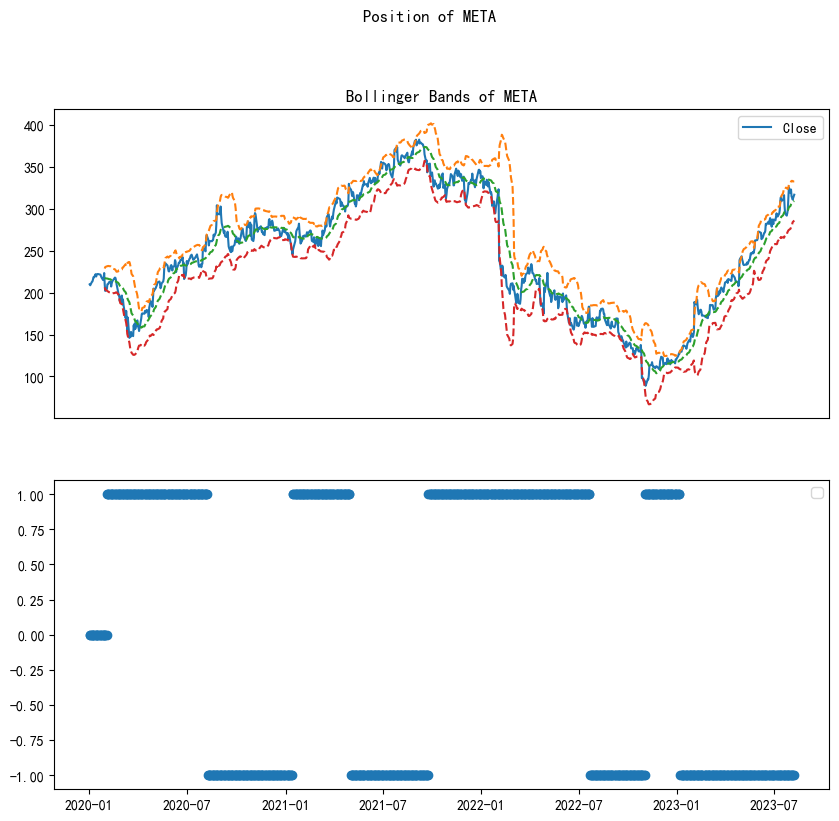

In [19]:
plt.subplot(2,1,1)
plt.title('Bollinger Bands of META')
plt.gca().axes.get_xaxis().set_visible(False)
stock_data['Close'].plot(figsize=(10,10))
plt.plot(stock_data['Upper'], linestyle='--')
plt.plot(stock_data['Middle'], linestyle='--')
plt.plot(stock_data['Lower'], linestyle='--')
plt.legend()

plt.subplot(2,1,2)
plt.plot(stock_data['position'], marker='o', linestyle='')
plt.legend()
plt.suptitle('Position of META')

In [22]:
# Visualize the profits
# 计算股票每日收益率
stock_data['pct_change'] = stock_data['Close'].pct_change()
# 计算策略每日收益率
stock_data['strategy_return'] = stock_data['pct_change'] * stock_data['position']
# 计算股票累积收益率
stock_data['return'] = (stock_data['pct_change']+1).cumprod()
# 计算策略累积收益率
stock_data['strategy_cum_return'] = (1 + stock_data['strategy_return']).cumprod()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


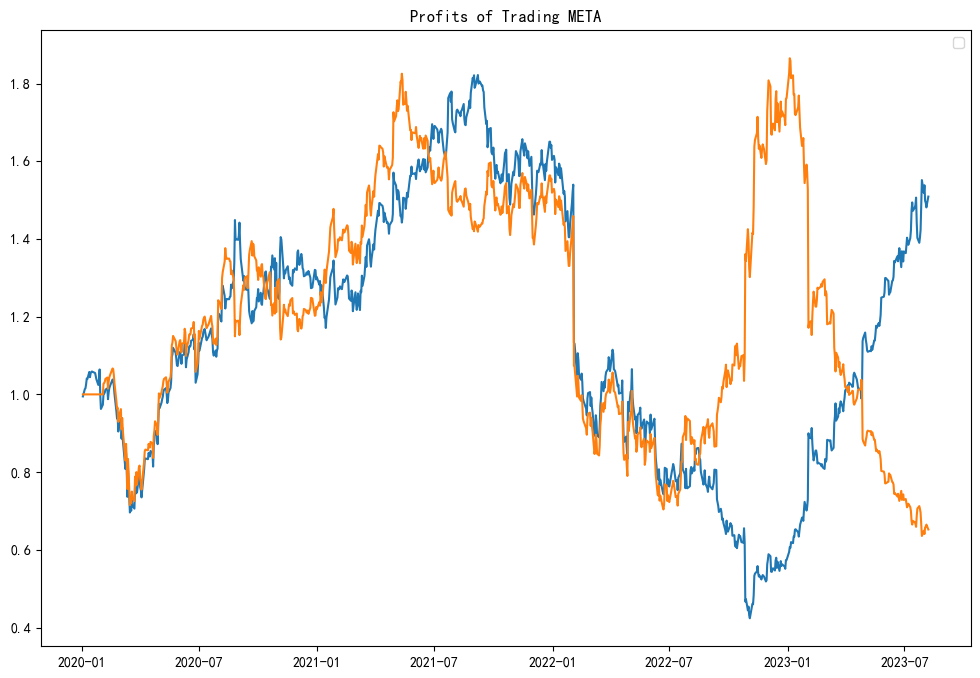

In [25]:
# Plot it
fig = plt.figure(figsize = (12,8))
plt.plot(stock_data['return'])
plt.plot(stock_data['strategy_cum_return'])
plt.title('Profits of Trading META')
plt.legend()
plt.show()